# Load data into Spark DataFrame

In [66]:
from pyspark import SparkContext

In [67]:
import pyspark.sql.functions as F

In [68]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [69]:
# load event data 
df_play = spark.read.csv('../data/event_play.csv',header=True).cache()
df_ds = spark.read.csv('../data/event_down_search.csv',header=True).cache()

In [70]:
df = df_play.union(df_ds)

In [71]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168535490|    P| 6616004|2017-03-30|
|168540348|    P|   77260|2017-03-30|
|168550572|    P| 4297299|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168532776|    P|20674091|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168550564|    P|  708741|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548239|    P| 6673573|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168540348|    P| 6437996|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168549948|    P|23082492|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [72]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [73]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168535490|    P| 6616004|2017-03-30|
|168540348|    P|   77260|2017-03-30|
|168550572|    P| 4297299|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168532776|    P|20674091|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168550564|    P|  708741|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548239|    P| 6673573|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168540348|    P| 6437996|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168549948|    P|23082492|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [74]:
# simple count rows
df.count()

12277951

In [75]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59235

In [76]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  614053|
|    S|  751184|
|    P|10912714|
+-----+--------+



In [77]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  614053|99765326|
|    S|  751184|99765326|
|    P|10912714|99765326|
+-----+--------+--------+



In [78]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 28719|
|2017-04-01|    P|489151|
|2017-04-01|    S| 33278|
|2017-04-02|    D| 30561|
|2017-04-02|    P|448858|
|2017-04-02|    S| 30701|
|2017-04-03|    D| 20528|
|2017-04-03|    P|254741|
|2017-04-03|    S| 24203|
|2017-04-04|    D| 20932|
|2017-04-04|    P|371611|
|2017-04-04|    S| 23604|
|2017-04-05|    D| 14866|
|2017-04-05|    P|310301|
|2017-04-05|    S| 18990|
+----------+-----+------+



In [79]:
# transform to pandas dataframe
date_count = df.groupBy('date').count().toPandas()

(array([ 736419.,  736426.,  736433.,  736440.,  736447.,  736454.,  736461.]),
 <a list of 7 Text xticklabel objects>)

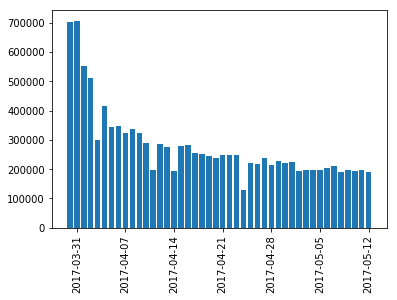

In [80]:
# plot count by date  
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [81]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [82]:
# all the uid we will model: 
# users that has actitvity during the window defined
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0) i.e. active users defined as 0. 
# active as in at least one event occured during the window time. 
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [83]:
# prepare label data (churn label=1; active label=0)
# use left join,and the none 
# 1 is churn 
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [84]:
# churned about 60% 
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|35989|
|    0|21954|
+-----+-----+



# Feature generation

In [ ]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [ ]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    # filter by event 
    # then filter by date, date should be ending at a given data , and start at enddate-window size
    # then group by uid and count uid to generate frequency


    df_frequency = df \
        .filter(F.col('event')==event) \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))      

    return df_frequency

In [ ]:
# generate one feature to try out
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_frequency = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [ ]:
df_frequency.show(5)

In [ ]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
# for different time window 
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [ ]:
df_feature_list

##### method 2: too many dfs to join? do it another way

define a function to generate frequency features for a list of time windows
using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

 generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


df_feature_list

### Recency features

In [ ]:
# defined as days from last event
# can generate one feature for each type of event

def recency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate recency features for one event type and one time window
    """   
    # filter by event 

    # then filter by date. Date should be ending at a given data , and start at end_date minus the window size

    # then group by uid and calculate the most recent event date (max date) 


    df_recency = df \
        .filter(F.col('event')==event) \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .groupBy('uid').agg(F.max(F.col('date'))
        .alias('most_recent_date'))
                            
    col_name = 'recent_'+event+'_last_'+str(time_window)  
    
    # finally, calculate the dates from the 
    df_recency =  df_recency \
        .withColumn(col_name,F.datediff(F.lit(snapshot_date),F.col("most_recent_date"))) \
        .select("uid",col_name)
        

    return df_recency



In [ ]:
# generate one feature to try out
event = 'S'
time_window = 7
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_recency = recency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [ ]:
df_recency.show()

In [ ]:
event_list = ['P','D','S']
# for different time window 
time_window_list = [7,14,30]
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(recency_feature_generation(df_feature_window,event,time_window,snapshot_date))


### Profile features

In [ ]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

In [ ]:
# filter by the date window and select profile related features
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [ ]:
df_profile_tmp.groupBy('device').count().show()

In [ ]:
# check if one user has two devices
df_profile_tmp.count()

In [ ]:
df_profile_tmp.distinct().count()

In [ ]:
# select iphone as 1 and others as 2(mostly andriod)
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

In [ ]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='inner')
df_profile.groupBy('device_type').count().show()

In [ ]:
df_profile.show()

### Total play time features

In [ ]:
# generate total song play time features (using play_ds data) for different time window
# using play data

# filter by the date window and select song play time related features

#  uid|device|song_id|      date|play_time|song_length|
    
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

# filter play time that are not positive
df_play_time_tmp = df_play_feature_window.select('uid','play_time').distinct() \
                                         .filter(F.col('play_time')>0)



In [ ]:
df_play_time_tmp.show(5)

In [ ]:
# function for generating Total play time by user, in a given time window 

def playtime_feature_generation(df,time_window,snapshot_date):
    """
    generate playtime features for one time window
    """   
    # then filter by date. Date should be ending at a given data , and start at end_date minus the window size

    # then group by uid and calculate the most recent event date (max date) 


    df_playtime = df \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .groupBy('uid').agg(F.sum(F.col('play_time')).alias('tot_playtime'+'_last_'+str(time_window)))      

    return df_playtime


In [ ]:
# generate one feature to try out
time_window = 7
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_playtime = playtime_feature_generation(df_play_time_tmp,time_window,snapshot_date)

In [ ]:
df_playtime.show(5)

In [ ]:
# go on to try this out for all time windows

# for different time window 
time_window_list = [1,3,7,14,30]
for time_window in time_window_list:
    df_feature_list.append(playtime_feature_generation(df_play_time_tmp,time_window,snapshot_date))



### Songs fully played

In [ ]:
# using play data (need to clean play time and song length first,
# play time may be negative in data,
# song length may be zeros)

#  uid|device|song_id|  date|play_time|song_length|

# filter play time that are not positive
df_songs_length = df_play_feature_window.select('uid','play_time','song_length').distinct() \
                                         .filter((F.col('play_time')>0) & (F.col('song_length')>0)) \
                                         .withColumn("percent",F.col('play_time')/F.col('song_length'))
                                        



In [ ]:
df_songs_length.show(5)

In [ ]:
# Generate counts of songs play 80% of their song length (using play_ds data) for different time window
    

# function for generating songs play 80% of their song length by user, in a given time window 

def songs_feature_generation(df,time_window,snapshot_date):
    """
    generate songs count features for one event type and one time window
    """   
    #  filter by date. Date should be ending at a given data , and start at end_date minus the window size
    
    # filter by percent, should be bigger than 0.8
    # aggregate the number of songs per user

    df_songs = df \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .filter(F.col('percent')>=0.8) \
        .groupBy('uid').agg(F.count(F.col('uid')).alias('songs_full'+'_last_'+str(time_window)))      


    return df_songs





In [ ]:
# generate one feature to try out
time_window = 7
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_songs = songs_feature_generation(df_songs_length,time_window,snapshot_date)

In [ ]:
df_songs.show(5)

In [ ]:
# go on to try this out for all time windows

# for different time window 
time_window_list = [1,3,7,14,30]
for time_window in time_window_list:
    df_feature_list.append(songs_feature_generation(df_songs_length,time_window,snapshot_date))


### Mean Play  Percentage Feature



In [ ]:
# Generate average songs played progress (using play_ds data) for different time window
    

# function for generating average of the songs played progress , in a given time window 

def song_percent_feature_generation(df,time_window,snapshot_date):
    """
    generate average songs played progress features for one time window
    """   
    #  filter by date. Date should be ending at a given data , and start at end_date minus the window size
    
    # 
    # then group by uid and calculate the most recent event date (max date) 

    df_songs_percent = df \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .groupBy('uid').agg(F.mean(F.col('percent')).alias('mean_percent'+'_last_'+str(time_window)))      


    return df_songs_percent




In [ ]:
# generate one feature to try out
time_window = 7
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_songs_percent = song_percent_feature_generation(df_songs_length,time_window,snapshot_date)

In [ ]:
df_songs_percent.show(5)

In [ ]:
# go on to try this out for all time windows

# for different time window 
time_window_list = [1,3,7,14,30]
for time_window in time_window_list:
    df_feature_list.append(song_percent_feature_generation(df_songs_length,time_window,snapshot_date))



### SD Play  Percentage Feature




In [ ]:
# Generate the sd of songs played progress (using play_ds data) for different time window
    

# function for generating sd of the songs played progress , in a given time window 

def song_sd_feature_generation(df,time_window,snapshot_date):
    """
    generate sd songs played progress features for one time window
    """   
    #  filter by date. Date should be ending at a given data , and start at end_date minus the window size
    
    # 
    # then group by uid and calculate the most recent event date (max date) 

    df_songs_sd = df \
        .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date)) \
        .groupBy('uid').agg(F.stddev(F.col('percent')).alias('sd_percent'+'_last_'+str(time_window)))      


    return df_songs_sd



In [ ]:
# generate one feature to try out
time_window = 7
snapshot_date = feature_window_end_date
# call the function and return data frame 
df_songs_sd = song_sd_feature_generation(df_songs_length,time_window,snapshot_date)

In [ ]:
df_songs_sd.show(5)

In [ ]:
# go on to try this out for all time windows

# for different time window 
time_window_list = [1,3,7,14,30]
for time_window in time_window_list:
    df_feature_list.append(song_sd_feature_generation(df_songs_length,time_window,snapshot_date))



In [ ]:
df_feature_list[:-1]

# Form training data

In [ ]:
# function to join data frames
# do left join for df master 

def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [63]:
df_feature_list.append(df_profile)

In [64]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [ ]:
# join all profile features
# df_model_final = join_feature_data(df_model_final,[df_profile])

In [65]:
# write into a csv 
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)